In [1]:
%load_ext autoreload
%autoreload 2

from state              import State
from domain             import Domain
from swe_operators      import SweLinearOperator, SweAdvectiveFormOperator, SweVecInvFormOperator, SweAdvectionOnlyFormOperator
from time_schemes       import rk4
from initial_conditions import gaussian_hill, barotropic_instability, gaussian_hill_linexy, gaussian_hill_linex, gaussian_hill_liney, gaussian_hill_circle, gaussian_hill_2circle
from vizualization      import surf_field, imshow_field
from vizualization      import animate_imshow, animate_surf, surf_field

import operators         as op
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# definition of computational domain constants
RADZ = 6371.22 * 1000.0 # "Earth" radii in meters
GRAV = 9.80616 # "Earth" gravity acceleration in m * s**(-2)
OMEGA = 7.292 * 10**(-5) # "Earth" angular velocity in rad * s**(-1)
PCORI = 2 * OMEGA # Coriolis parameter
H_MEAN = 10 * 1000.0 # "Earth" mean atmosphere depth
C_GRAV = np.sqrt(GRAV * H_MEAN) # Gravity wave speed
LX = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]
LY = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]

In [3]:
%%time
import time
from IPython.display import display, clear_output

domain = Domain(xs = 0.0, xe = LX, nx = 128, ys = 0.0, ye = LY, ny = 128)
state = gaussian_hill_2circle(domain, H_MEAN)
#state = barotropic_instability(domain, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
swe_operator = SweAdvectionOnlyFormOperator(g = GRAV, pcori = PCORI, diff_method = op.upstream1)

T = 10 * 3600 * 24.0
Nt = 960
dt = T / Nt

states_list = [state]
for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state = rk4(state, swe_operator, dt, domain)
    states_list.append(state)

'Time step 960'

CPU times: user 1min 52s, sys: 1.6 s, total: 1min 54s
Wall time: 1min 54s


<IPython.core.display.Javascript object>


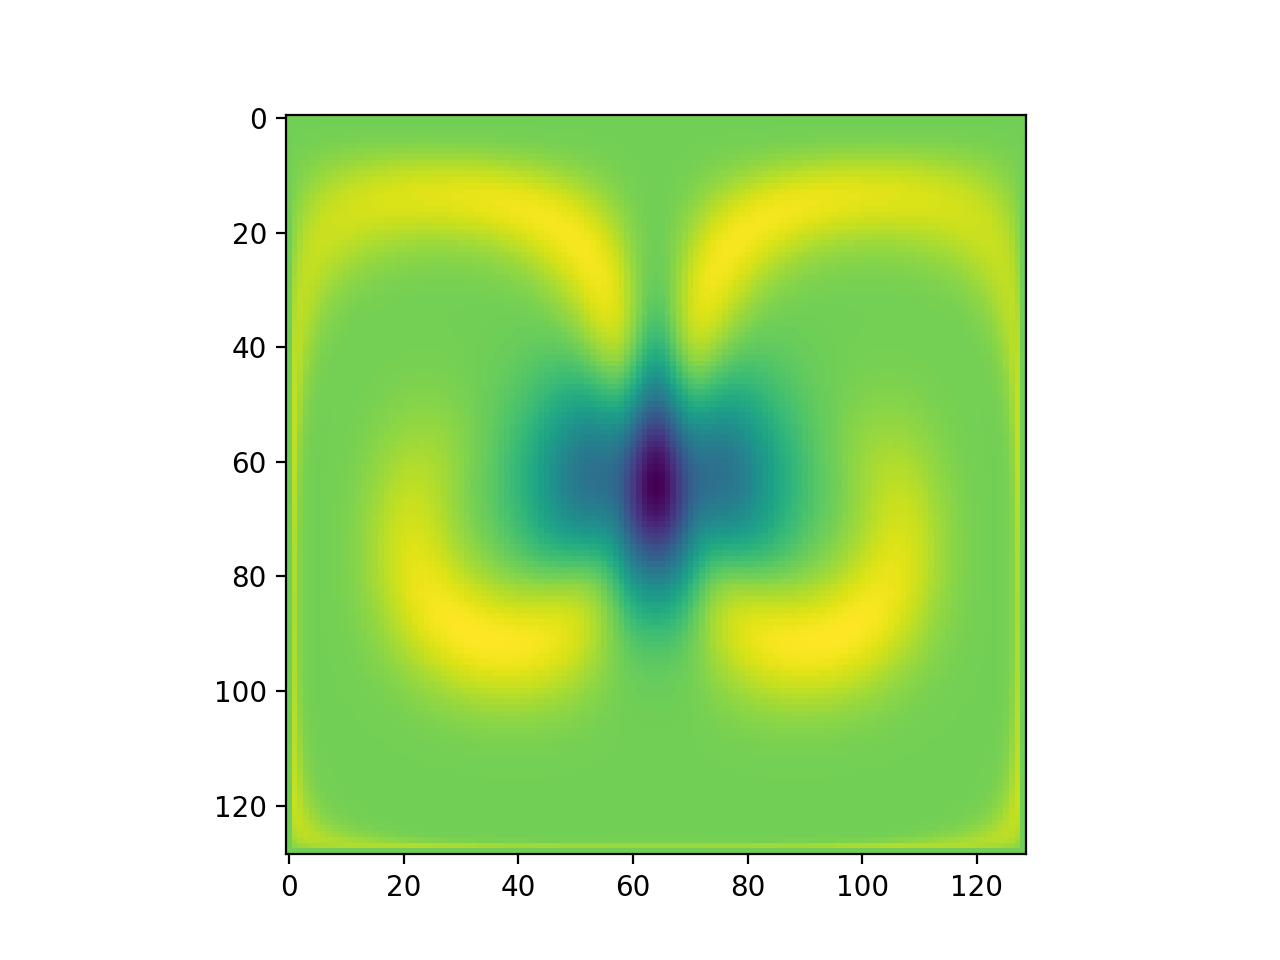

In [4]:
h_list = [state.h for state in states_list]
u_list = [state.u for state in states_list]
v_list = [state.v for state in states_list]
curl_list = [op.calc_curl(state.u, state.v, domain, op.diff_sbp42) for state in states_list]

errors = h_list[-1] - h_list[0]
plt.imshow(errors)

<IPython.core.display.Javascript object>


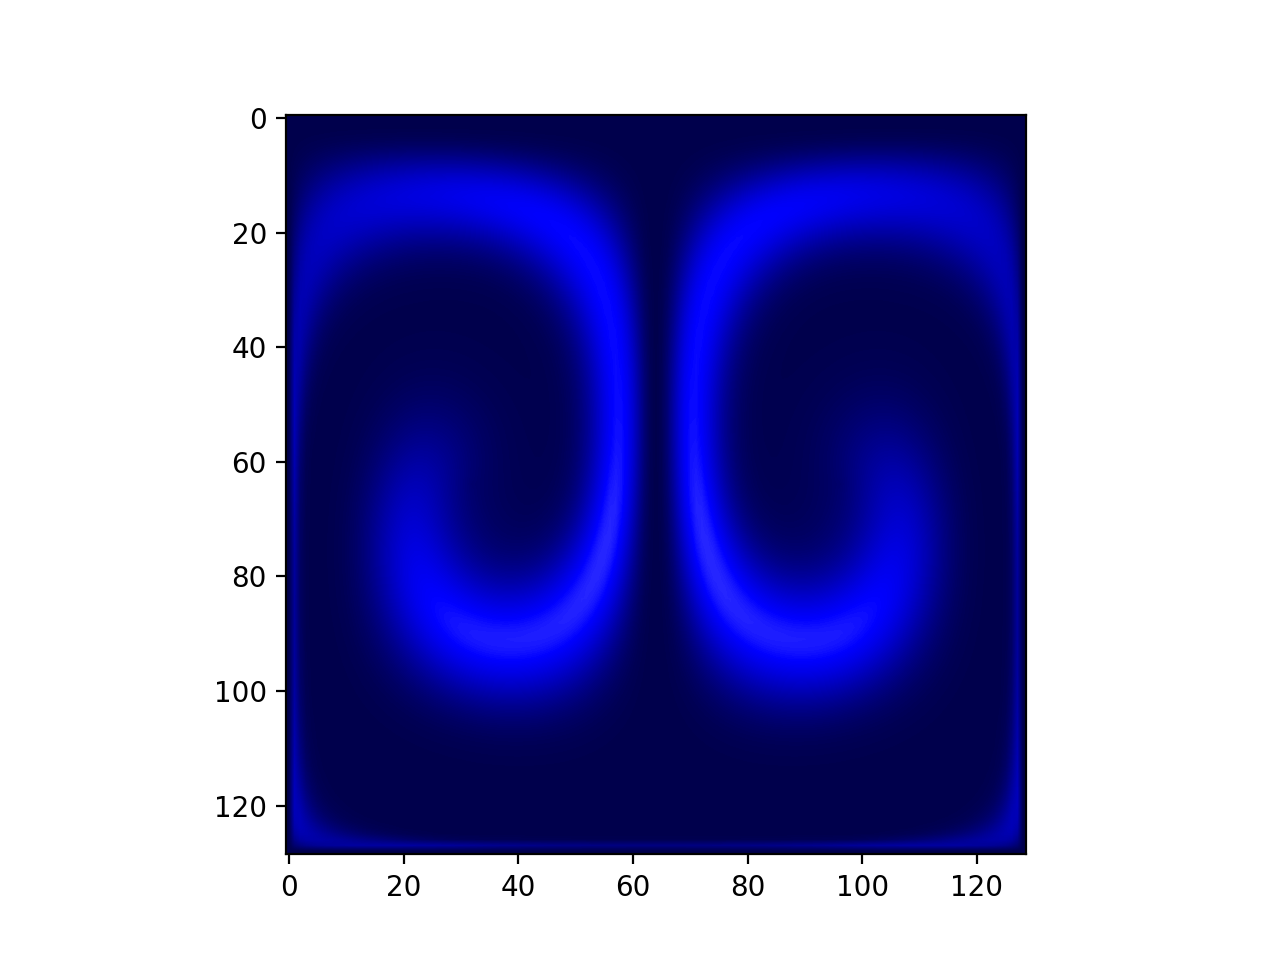

In [6]:
anim = animate_imshow(h_list, domain, anim_speed=1)